In [2]:
import numpy as np
import pandas as pd
!pip install -U scikit-fuzzy
import skfuzzy as fuzz
import matplotlib as plt
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0MB 25.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=8b158e15db87dafa00c9fd34da5f794b6e36f5fd9d1f0fed4cfc1047344455f8
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


0.4
0.5
0.5
[0.  0.  0.  ... 0.4 0.4 0.4]


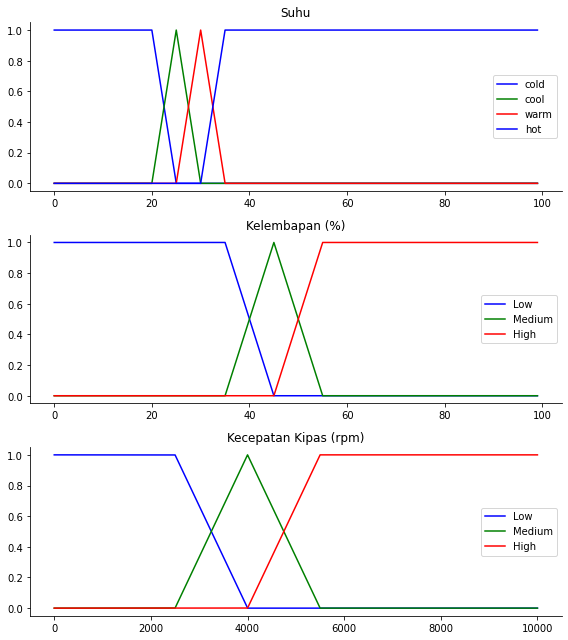

In [22]:
x_suhu = np.arange(0, 100, 1) #dalam celcius
x_humidity = np.arange(0, 100, 1) #kelembapan dalam persen
x_kipas  = np.arange(0, 10000, 1) #kecepatan kipas

# Generate fuzzy membership functions
suhu_cold = fuzz.trapmf(x_suhu, [0,0,20,25])
suhu_cool = fuzz.trimf(x_suhu, [20, 25, 30])
suhu_warm = fuzz.trimf(x_suhu, [25, 30, 35])
suhu_hot = fuzz.trapmf(x_suhu, [30,35,100,100])
humidity_low = fuzz.trapmf(x_humidity, [0,0, 35, 45])
humidity_medium = fuzz.trimf(x_humidity, [35, 45, 55])
humidity_high = fuzz.trapmf(x_humidity, [45, 55, 100,100])
kipas_low = fuzz.trapmf(x_kipas, [0,0, 2500, 4000])
kipas_medium = fuzz.trimf(x_kipas, [2500, 4000, 5500])
kipas_high = fuzz.trapmf(x_kipas, [4000,5500,10000,10000])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_suhu, suhu_cold, 'b', linewidth=1.5, label='cold')
ax0.plot(x_suhu, suhu_cool, 'g', linewidth=1.5, label='cool')
ax0.plot(x_suhu, suhu_warm, 'r', linewidth=1.5, label='warm')
ax0.plot(x_suhu, suhu_hot, 'b', linewidth=1.5, label='hot')
ax0.set_title('Suhu')
ax0.legend()

ax1.plot(x_humidity, humidity_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_humidity, humidity_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_humidity, humidity_high, 'r', linewidth=1.5, label='High')
ax1.set_title('Kelembapan (%)')
ax1.legend()

ax2.plot(x_kipas, kipas_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_kipas, kipas_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_kipas, kipas_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Kecepatan Kipas (rpm)')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
level_suhu_hot = fuzz.interp_membership(x_suhu,suhu_hot,32)
level_humidity_low = fuzz.interp_membership(x_humidity, humidity_low, 40)
print(level_suhu_hot)
print(level_humidity_low)
print(np.fmax(level_humidity_low,level_suhu_hot))

print(np.fmin(level_suhu_hot,kipas_high))

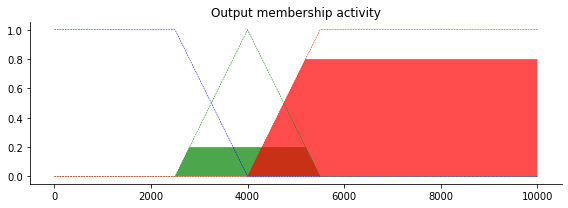

In [49]:
level_suhu_cold = fuzz.interp_membership(x_suhu, suhu_cold, 34)
level_suhu_cool = fuzz.interp_membership(x_suhu, suhu_cool, 34)
level_suhu_warm = fuzz.interp_membership(x_suhu, suhu_warm, 34)
level_suhu_hot = fuzz.interp_membership(x_suhu,suhu_hot,34)

level_humidity_low = fuzz.interp_membership(x_humidity, humidity_low, 70)
level_humidity_med = fuzz.interp_membership(x_humidity, humidity_medium, 70)
level_humidity_high = fuzz.interp_membership(x_humidity, humidity_high, 70)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = level_suhu_hot
active_rule2 = np.fmin(level_humidity_med, level_suhu_warm)
active_rule3 = np.fmin(level_humidity_high, level_suhu_warm)
active_rule4 = np.fmin(level_humidity_low, level_suhu_warm)
active_rule5 = level_suhu_cool
active_rule6 = np.fmax(level_humidity_low, level_suhu_cold)


kipas_activation_high1 = np.fmin(active_rule1, kipas_high)  
kipas_activation_med1 = np.fmin(active_rule2, kipas_medium)
kipas_activation_med2 = np.fmin(active_rule3, kipas_medium)
kipas_activation_med3 = np.fmin(active_rule4, kipas_medium)
kipas_activation_low1 = np.fmin(active_rule5, kipas_low)
kipas_activation_low2 = np.fmin(active_rule6, kipas_low)


kipas0 = np.zeros_like(x_kipas)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_kipas, kipas0, kipas_activation_low1, facecolor='b', alpha=0.7)
ax0.fill_between(x_kipas, kipas0, kipas_activation_low2, facecolor='b', alpha=0.7)
ax0.plot(x_kipas,kipas_low, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_kipas, kipas0, kipas_activation_med1, facecolor='g', alpha=0.7)
ax0.fill_between(x_kipas, kipas0, kipas_activation_med2, facecolor='g', alpha=0.7)
ax0.fill_between(x_kipas, kipas0, kipas_activation_med3, facecolor='g', alpha=0.7)
ax0.plot(x_kipas,kipas_medium, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kipas, kipas0, kipas_activation_high1, facecolor='r', alpha=0.7)
ax0.plot(x_kipas,kipas_high, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [50]:

aggregated = np.fmax(np.fmax(kipas_activation_low1,kipas_activation_low2),
                     np.fmax(kipas_activation_med1,kipas_activation_med2,kipas_activation_med3),kipas_activation_high1)

# Calculate defuzzified result
kipas = fuzz.defuzz(x_kipas, aggregated, 'centroid')
print(kipas)

4000.0000000001523
